<a href="https://colab.research.google.com/github/zcohen949/Astron-1221/blob/main/Week10Gode_GravitationalWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install gwpy # installs the gwpy library in python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.5 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99221 sha256=afbe2df86805041d2b5f424a67f01762881ff46e2cac35dbad07e6f5f63abc0f
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [2]:
# # -- Set a GPS time:
t0 = 1126259462.4    # -- GW150914
# t0 = 1187008882.4    # -- GW170817

from gwpy.timeseries import TimeSeries # imports the TimeSeries class from the gwpy.timeseries module
hdata = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478) # H1 = Data from Hanford, Washington
# this will fetch data between the two times

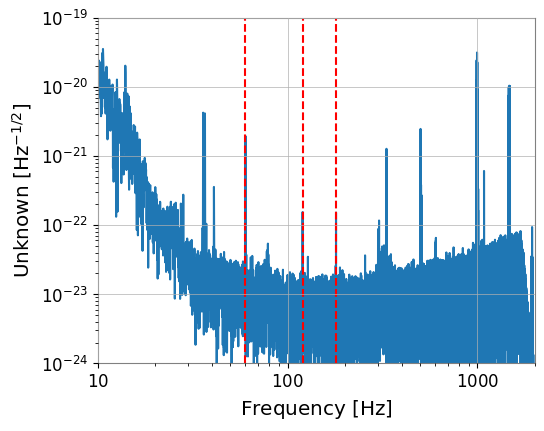

In [3]:
import matplotlib.pyplot as plt # imports plotting packages

# -- Plot ASD
fig2 = hdata.asd().plot() #plots hdata in a figure
plt.xlim(10,2000) # sets an x limit
ymin = 1e-24 # sets a y axis minimum
ymax = 1e-19 # sets a y axis maximum
plt.ylim(ymin, ymax) # sets the y limit to be between ymin and ymax
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red") # creates a vertical, red, dashed line at x = 60 Hz
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red") # creates a vertical, red, dashed line at x = 120 Hz
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red") # creates a vertical, red, dashed line at x = 180 Hz

In [4]:
from gwpy.signal import filter_design # imports filter_design module from gwpy.signal package
bp = filter_design.bandpass(50, 250, hdata.sample_rate) # filters out certain frequences between 50 and 250 Hz

notches = [filter_design.notch(line, hdata.sample_rate) for # creates a notch filter at specific frequences listed below
           line in (60, 120, 180)] # used in the notch filter

zpk = filter_design.concatenate_zpks(bp, *notches) # combines both filters under a new variable zpk

hfilt = hdata.filter(zpk, filtfilt=True) # applies zpk to the data to be filtered


In [5]:
hdata = hdata.crop(*hdata.span.contract(1)) # crops the data on both ends by 1 second
hfilt = hfilt.crop(*hfilt.span.contract(1)) # crops the filtered data on both ends by 1 second

In [6]:
print(*hdata.span.contract(1)) # prints the range of values, basically the start and end time of the data after cropping it

1126259448.0 1126259476.0


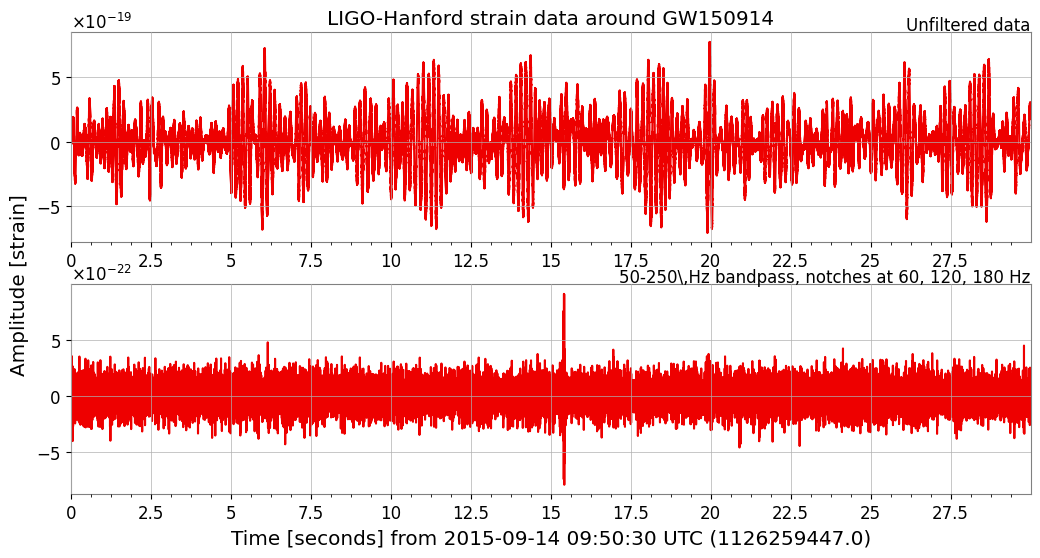

In [8]:
from gwpy.plot import Plot # imports the plot class from the gwpy.plot module
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True, # creates a plot using the unfiltered data and filtered data, while setting a size for the figure, making two subplots, putting one above the other
            color='gwpy:ligo-hanford') # sets a color to the graphs
ax1, ax2 = plot.axes # splits the axes objects of the two subplots into two variables
ax1.set_title('LIGO-Hanford strain data around GW150914') # names the first plot
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right') # adds a text label to the first plot
ax1.set_ylabel('Amplitude [strain]', y=-0.2) # sets a y axis label for the first plot in between the first and second plots
ax2.set_ylabel('') # basically removes the y axis from the second plot, because it will share with plot 1
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz', # adds a text label to the second subplot
         transform=ax2.transAxes, ha='right')
plot.show() # creates the plots to be shown

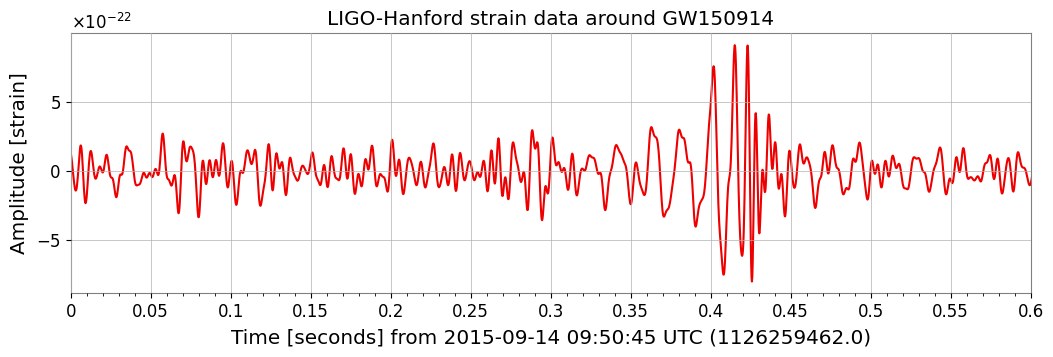

In [9]:
import matplotlib.pyplot as plt # imports plotting module and assigns it to plot

plot = hfilt.plot(color='gwpy:ligo-hanford') # generates a plot of the filtered data and assigns it a color
ax = plot.gca() # takes the current axes of the plot and assigns to ax
ax.set_title('LIGO-Hanford strain data around GW150914') # sets title for plot
ax.set_ylabel('Amplitude [strain]') # sets y axis label
ax.set_xlim(1126259462, 1126259462.6) # sets upper and lower x axis limits
ax.set_xscale('seconds', epoch=1126259462) # sets scaling of x axis to seconds, and defines an epoch
plot.show() # creates the plot

x_val = plt.gca().lines[0].get_xdata() # gets the x value of the data points
y_val = plt.gca().lines[0].get_ydata() # gets the y axis of the data points


In [10]:
ldata = TimeSeries.fetch_open_data('L1', 1126259446, 1126259478) # fetches  strain data and stores in ldata variable
lfilt = ldata.filter(zpk, filtfilt=True) # applies the filter zpk to ldata, and stores the filtered data in lfilt

In [11]:
lfilt.shift('6.9ms') # shifts the data within lfilt forward in time by 6.9 ms
lfilt *= -1 # multiplies the data in lfilt by -1

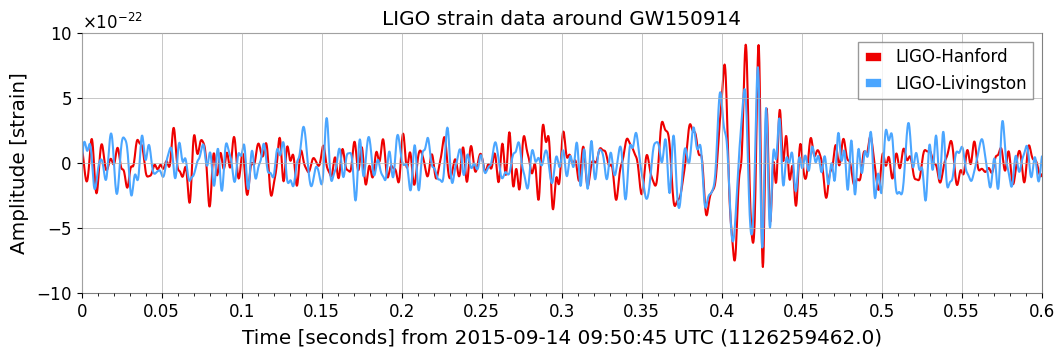

In [12]:
plot = Plot(figsize=[12, 4]) # creates a new plot that is 12x4
ax = plot.gca() # takes the current axes of the plot and assigns to ax
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford') # plots the filtered data from ligo-Hanford
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston') # plots the filtered data from ligo-livingston
ax.set_title('LIGO strain data around GW150914') # gives the plot a title
ax.set_xlim(1126259462, 1126259462.6) # sets an upper and lower limit for the x axis
ax.set_xscale('seconds', epoch=1126259462) # sets scaling of x axis to seconds, and defines an epoch
ax.set_ylabel('Amplitude [strain]') # gives the y axis a label
ax.set_ylim(-1e-21, 1e-21) # sets the y axis limits
ax.legend() # gives the plot a legend
plot.show() # creates the plot

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

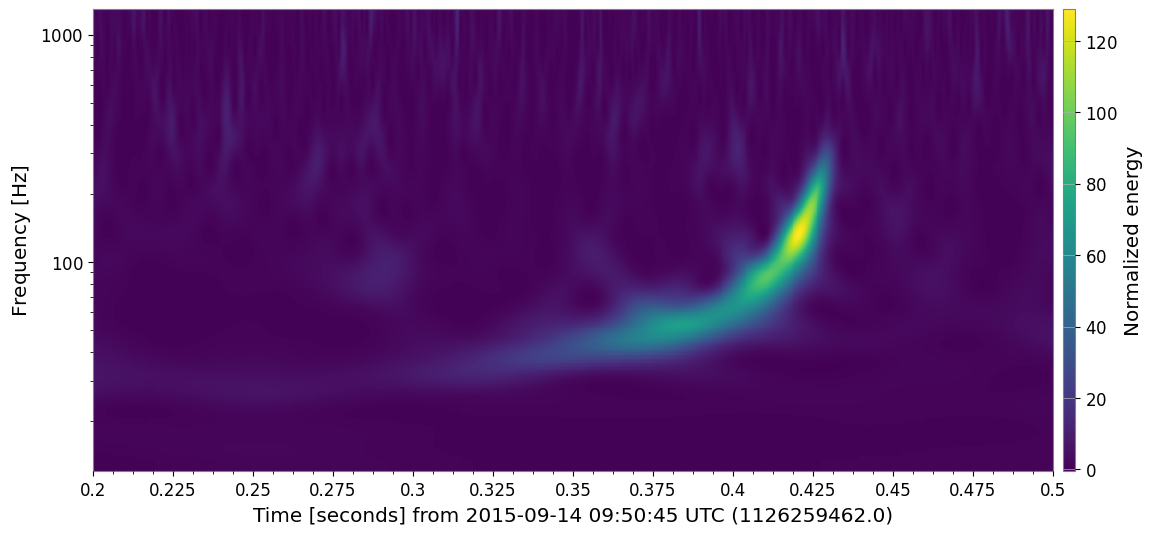

In [13]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.1)) # uses q_transform to analyze hfilt over time
fig4 = hq.plot() # plots hq, the q_transform data
ax = fig4.gca() # gets the current axes of the fig4 plot and sets it to the variable ax
fig4.colorbar(label="Normalized energy") # adds and names a colorbar to the plot
ax.grid(False) # turns off grid lines
ax.set_yscale('log') # sets the y axis to be on the log scale, helping better visualize the large numbers of the data

In [14]:
from scipy.io.wavfile import write # imports the write function from the scipy libary, the io subpackage, and the wavfile sub-module
import numpy as np # imports the numpy library as np

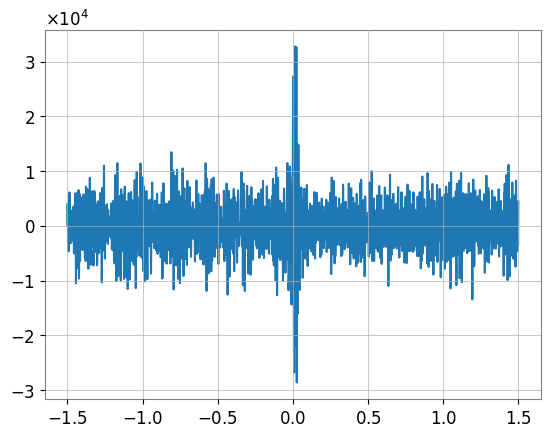

In [15]:
amplitude = np.iinfo(np.int16).max # finds the amplitude from the data

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5))) # finds the indices  1.5 seconds before and after t0
y = y_val[ind] # indices the y_val variable
# y = y**3
y = y / np.max(y) # finds the normal values in the y array
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16)) # plots the data

In [16]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0)))) # finds the sampling frequency
print("fs = ", fs) # prints the sampling frequency
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16)) # saves the audio data to a WAV file

fs =  4096


In [17]:
from google.colab import files # imports files module from google.colab library
files.download("example.wav") # downloads the file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Beautify the GW sound

0.5
fs =  4096


<ipython-input-19-1609a33c7c88>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication") # plots y_old data
<ipython-input-19-1609a33c7c88>:47: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication") # plots
<ipython-input-19-1609a33c7c88>:55: ComplexWarning: Casting complex values to real discards the imaginary part
  write("example.wav", fs, (np.array(y[0:int(num/up_sample)]) * amplitude).astype(np.int16))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

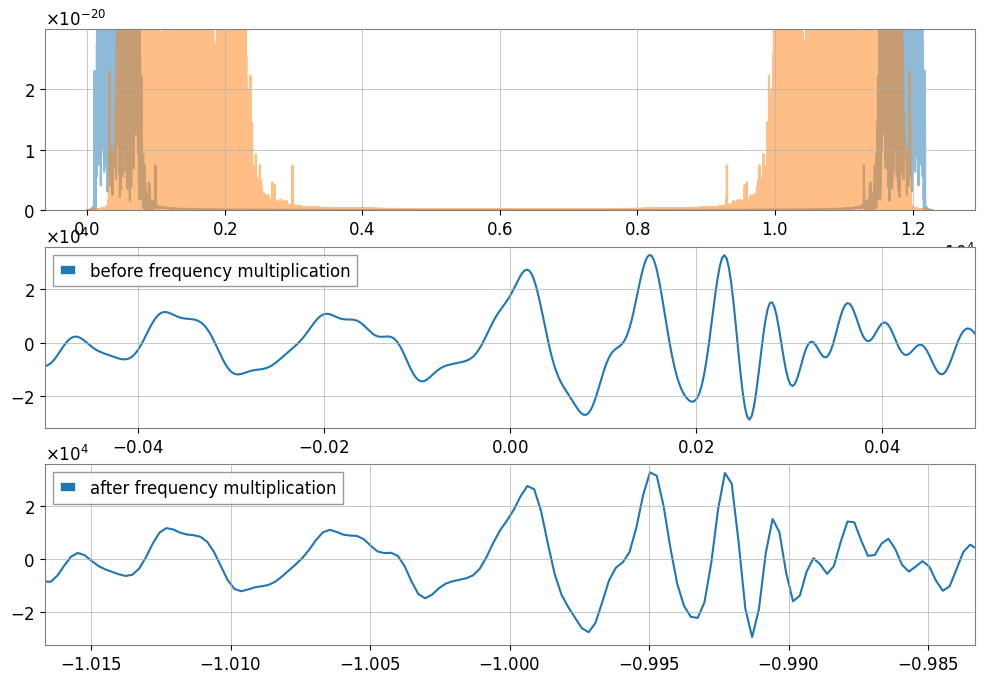

In [19]:
t_clip = 1.5 # defines the time clip duration as 1.5 seconds
amplitude = np.iinfo(np.int16).max # assigns the amplitude as the maximum value of the data

ind = np.where((x_val < (t0+t_clip)) & (x_val > (t0-t_clip))) # finds the indices of the data points within a specific time
x = x_val[ind] # indices x_val
y = y_val[ind] # indices y_val

# plt.plot(x - t0, (np.array(y / np.max(y)) * amplitude) + 10000, label="oringinal")
# print(np.min(np.array(y / np.max(y)) * amplitude), np.max(np.array(y / np.max(y)) * amplitude))

up_sample = 3 # sets upsampling factor to 3

y_fft = np.fft.fft(y) # transforms domain from time to frequency
y_fft_new = np.zeros(np.shape(y_fft), dtype=np.cdouble) # creates a new identical array while zeroing the function
y_fft_old = y_fft # renames y_fft variable

num = len(y_fft) # sets the variable num to be the number of variables in y_fft
for i in np.arange(int(num / up_sample)):
    y_fft_new[int(i * up_sample)] = y_fft[int(i)] # turns values into array and indices

y_old = np.fft.ifft(y_fft_old) # finds y_old by using IFFT on y_fft_old data

for i in np.arange(num):
  if i > (num / 2):
    y_fft_new[i] = np.conjugate(y_fft_new[int(num) - i]) # turns values into array and indices

# y_fft_new = np.fft.fftshift(y_fft_new)
y = np.fft.ifft(y_fft_new) # does IFFT on y_fft_new data and sets in variable y

plt.figure(figsize=(12,8)) # makes a plot that is size 12x8
plt.subplot(311) # makes a first subplot that is 3x1
plt.plot(np.abs(y_fft_old), alpha=0.5) # plots the absolute value of y_fft_old data
plt.plot(np.abs(y_fft_new), alpha=0.5) # plots the absolute value of y_fft_new data
ylim = np.percentile(np.abs(y_fft), 95) # finds the 95th percentile of the absolute values of y_fft data
plt.ylim(0, ylim) # sets y limit between 0 and ylim

plt.subplot(312) # creates second 3x1 subplot
# y_old = y_old**3 # to make the signal more distinct from the noise
y_old = y_old / np.max(y_old) # normalizes data so that it is less than or equal to 1
plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication") # plots y_old data
plt.xlim(-0.05, 0.05) # sets x limit between -0.05 and 0.05
plt.legend() # creates a legend in the plot

plt.subplot(313) # makes a third 3x1 subplot
# y = y**3 # to make the signal more distinct from the noise
y = y / np.max(y) # normalizes y data
plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication") # plots the normalized x data
plt.xlim(-t_clip + t_clip / up_sample - 0.05 / up_sample, -t_clip + t_clip / up_sample + 0.05 / up_sample) # sets the x axis limits to the time range of the event
plt.legend() # creates a legend in the plot
print(t_clip / up_sample) # prints the value of t_clip over up_sample

fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0)))) # calculates the sampling frequency
# fs = fs * 4 # to make the signal higher pitch
print("fs = ", fs) # prints this value
write("example.wav", fs, (np.array(y[0:int(num/up_sample)]) * amplitude).astype(np.int16)) # creates an audio file from the data

from google.colab import files # imports files from google.colab
files.download("example.wav") # downloads file

In [20]:
!pip install pydub # installs the library pydub, used for audio manipulation
from pydub import AudioSegment # imports AudioSegment class from libary

In [21]:
sound = AudioSegment.from_file("example.wav") # loads audio file into variable
print(sound.frame_rate) # prints frame rate of audio
# sound.frame_rate = 1024
sound = sound.set_frame_rate(4096 * 4) # sets frame rate
sound.frame_rate = 4096 * 2 #  modifies frame rate
sound.export("example_slow.wav") # saves new audio to file
files.download("example_slow.wav") # downloads file

4096
4096


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Make C

(0.0, 0.1)

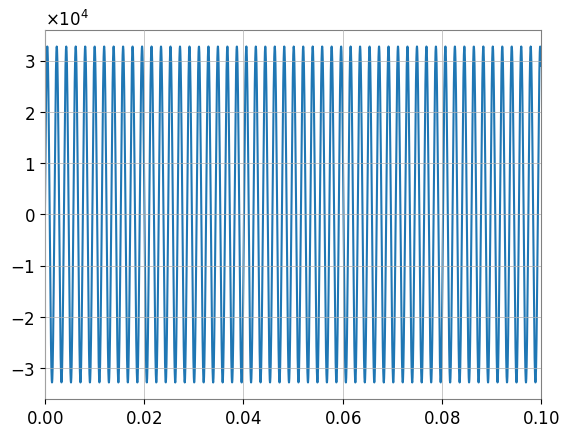

In [22]:
samplerate = 44100; fs = 261.63 * 2.0 # sets samplerate and fs variable (frequency)
t = np.linspace(0., 1., samplerate) # creates an array of time values between 0 and 1 based on samplerate
amplitude = np.iinfo(np.int16).max # sets amplitude to maximum value of data
data = amplitude * np.sin(2. * np.pi * fs * t) # creates variable equal to new sine wave of sound
plt.plot(t, data) # plots data
plt.xlim(0, 0.1) # creates x limit from 0 to 0.1

In [23]:
write("C.wav", samplerate, data.astype(np.int16)) # saves C.wav file, while formatting it at samplerate and in 16 integer
files.download("C.wav") # downloads new file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>